In [1]:
#importando bibliotecas importantes para o projeto 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gas-prices-in-brazil/2004-2021.tsv


In [2]:
#criando dataframe
df = pd.read_csv("../input/gas-prices-in-brazil/2004-2021.tsv",sep='\t',parse_dates = True)
df

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [3]:
#para simplificar, usarei apenas a data inicial de consulta, a região, produto, e preços de distribuição
colunas_a_remover = [1,5,6,7,8,9,10,11,12,14,15,16,17]
df.drop(df.columns[colunas_a_remover], axis = 1,inplace=True)
df

,DATA INICIAL,REGIÃO,ESTADO,PRODUTO,PREÇO MÉDIO DISTRIBUIÇÃO
0,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,0.825
1,2004-05-09,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,0.763
2,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,0.97
3,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,0.83
4,2004-05-09,NORDESTE,ALAGOAS,ETANOL HIDRATADO,0.941
...,...,...,...,...,...
120818,2021-04-25,NORTE,RORAIMA,OLEO DIESEL S10,-99999.0
120819,2021-04-25,SUL,SANTA CATARINA,OLEO DIESEL S10,-99999.0
120820,2021-04-25,SUDESTE,SAO PAULO,OLEO DIESEL S10,-99999.0
120821,2021-04-25,NORDESTE,SERGIPE,OLEO DIESEL S10,-99999.0


In [4]:
df.info()
#ao chegar o tipo dos dados, percebe-se que o preço está como "object" e deveria ser float, então vou transformar.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DATA INICIAL              120823 non-null  object
 1   REGIÃO                    120823 non-null  object
 2   ESTADO                    120823 non-null  object
 3   PRODUTO                   120823 non-null  object
 4   PREÇO MÉDIO DISTRIBUIÇÃO  120823 non-null  object
dtypes: object(5)
memory usage: 4.6+ MB


In [5]:
#transformando em float

for col in ["PREÇO MÉDIO DISTRIBUIÇÃO"]:
    
  df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DATA INICIAL              120823 non-null  object 
 1   REGIÃO                    120823 non-null  object 
 2   ESTADO                    120823 non-null  object 
 3   PRODUTO                   120823 non-null  object 
 4   PREÇO MÉDIO DISTRIBUIÇÃO  117423 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [6]:
#agora temos apenas a data inicial, região, estado, produto e preço médio. Mas tem alguns dados estranhos no preço ex. (-99999), vou remover esses.
df.drop(df[(df["PREÇO MÉDIO DISTRIBUIÇÃO"] < 0)].index, inplace=True)
df

,DATA INICIAL,REGIÃO,ESTADO,PRODUTO,PREÇO MÉDIO DISTRIBUIÇÃO
0,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,0.825
1,2004-05-09,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,0.763
2,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,0.970
3,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,0.830
4,2004-05-09,NORDESTE,ALAGOAS,ETANOL HIDRATADO,0.941
...,...,...,...,...,...
115879,2020-08-16,NORTE,RORAIMA,OLEO DIESEL S10,3.109
115880,2020-08-16,SUL,SANTA CATARINA,OLEO DIESEL S10,2.947
115881,2020-08-16,SUDESTE,SAO PAULO,OLEO DIESEL S10,2.973
115882,2020-08-16,NORDESTE,SERGIPE,OLEO DIESEL S10,3.046


In [7]:
#facilitando os nomes
df.rename(columns = {'DATA INICIAL':'DATA', 'PREÇO MÉDIO DISTRIBUIÇÃO':'PREÇO'}, inplace = True)
df

,DATA,REGIÃO,ESTADO,PRODUTO,PREÇO
0,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,0.825
1,2004-05-09,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,0.763
2,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,0.970
3,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,0.830
4,2004-05-09,NORDESTE,ALAGOAS,ETANOL HIDRATADO,0.941
...,...,...,...,...,...
115879,2020-08-16,NORTE,RORAIMA,OLEO DIESEL S10,3.109
115880,2020-08-16,SUL,SANTA CATARINA,OLEO DIESEL S10,2.947
115881,2020-08-16,SUDESTE,SAO PAULO,OLEO DIESEL S10,2.973
115882,2020-08-16,NORDESTE,SERGIPE,OLEO DIESEL S10,3.046


In [8]:
#mudando o nome para apenas etanol
df['PRODUTO'].replace(['ETANOL HIDRATADO'],'ETANOL', inplace = True)
df

,DATA,REGIÃO,ESTADO,PRODUTO,PREÇO
0,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL,0.825
1,2004-05-09,CENTRO OESTE,GOIAS,ETANOL,0.763
2,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL,0.970
3,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL,0.830
4,2004-05-09,NORDESTE,ALAGOAS,ETANOL,0.941
...,...,...,...,...,...
115879,2020-08-16,NORTE,RORAIMA,OLEO DIESEL S10,3.109
115880,2020-08-16,SUL,SANTA CATARINA,OLEO DIESEL S10,2.947
115881,2020-08-16,SUDESTE,SAO PAULO,OLEO DIESEL S10,2.973
115882,2020-08-16,NORDESTE,SERGIPE,OLEO DIESEL S10,3.046


In [9]:
#removendo dados que não sejam do etanol
df.drop(df[(df["PRODUTO"] != "ETANOL")].index, inplace=True)
df

,DATA,REGIÃO,ESTADO,PRODUTO,PREÇO
0,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL,0.825
1,2004-05-09,CENTRO OESTE,GOIAS,ETANOL,0.763
2,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL,0.970
3,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL,0.830
4,2004-05-09,NORDESTE,ALAGOAS,ETANOL,0.941
...,...,...,...,...,...
115754,2020-08-16,NORTE,RORAIMA,ETANOL,2.974
115755,2020-08-16,SUL,SANTA CATARINA,ETANOL,2.916
115756,2020-08-16,SUDESTE,SAO PAULO,ETANOL,2.236
115757,2020-08-16,NORDESTE,SERGIPE,ETANOL,2.883


In [10]:
#calculando a media do preço no brasil entre todos os dados disponíveis
media_etanol = np.mean(df.PREÇO)
media_etanol

2.0566795646916565

In [11]:
#valor maximo do etanol 
maximo_etanol = np.amax(df.PREÇO)
maximo_etanol

4.073

In [12]:
#valor minimo do etanol
min_etanol = np.amin(df.PREÇO)
min_etanol

0.57

In [13]:
#agora vou gerar gráficos com preços em cada região do país

Text(0.5, 1.0, 'Preço do Etanol por tempo no Brasil')

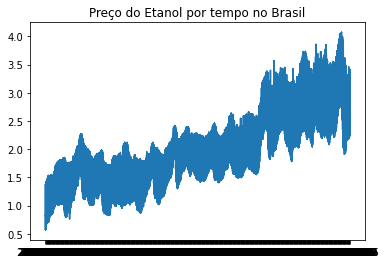

In [14]:
plt.plot(df.DATA, df.PREÇO)
plt.title("Preço do Etanol por tempo no Brasil")

Text(0.5, 1.0, 'Preço do Etanol por tempo no Centro Oeste')

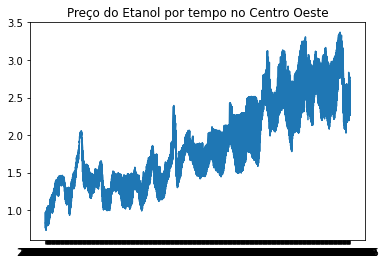

In [15]:
df_centrooeste = df.drop(df[(df["REGIÃO"] != "CENTRO OESTE")].index)
df_centrooeste

plt.plot(df_centrooeste.DATA, df_centrooeste.PREÇO)
plt.title("Preço do Etanol por tempo no Centro Oeste")

Text(0.5, 1.0, 'Preço do Etanol por tempo no Sul')

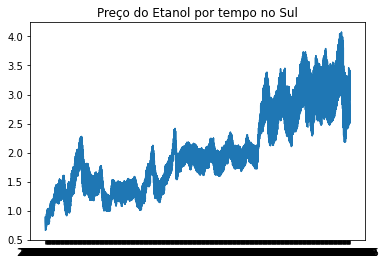

In [16]:
df_sul = df.drop(df[(df["REGIÃO"] != "SUL")].index)
df_sul

plt.plot(df_sul.DATA, df_sul.PREÇO)
plt.title("Preço do Etanol por tempo no Sul")

Text(0.5, 1.0, 'Preço do Etanol por tempo no Sudeste')

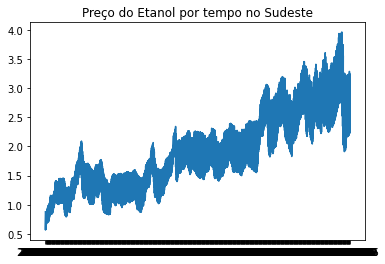

In [17]:
df_sudeste = df.drop(df[(df["REGIÃO"] != "SUDESTE")].index)
df_sudeste

plt.plot(df_sudeste.DATA, df_sudeste.PREÇO)
plt.title("Preço do Etanol por tempo no Sudeste")

Text(0.5, 1.0, 'Preço do Etanol por tempo no Norte')

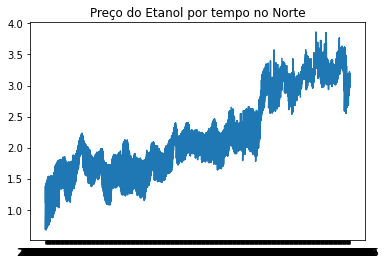

In [18]:
df_norte = df.drop(df[(df["REGIÃO"] != "NORTE")].index)
df_norte

plt.plot(df_norte.DATA, df_norte.PREÇO)
plt.title("Preço do Etanol por tempo no Norte")

Text(0.5, 1.0, 'Preço do Etanol por tempo no nordeste')

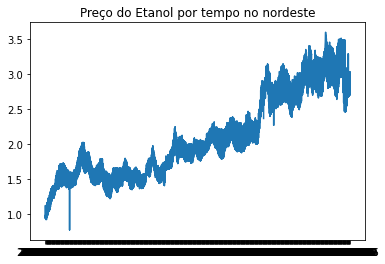

In [19]:
df_nordeste = df.drop(df[(df["REGIÃO"] != "NORDESTE")].index)
df_nordeste

plt.plot(df_nordeste.DATA, df_nordeste.PREÇO)
plt.title("Preço do Etanol por tempo no nordeste")